In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# Q1

In [2]:
img = cv.imread('boat.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, th = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

where = np.array(np.where(th))
x1, y1 = np.amin(where, axis=1)
x2, y2 = np.amax(where, axis=1)

res = cv.rectangle(img, (y1, x1), (y2, x2), (200, 0, 0), 2, cv.LINE_AA)

cv.imshow('box image', res)
cv.waitKey(0)
cv.destroyAllWindows()

# Q2

2. Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).

* Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
* Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.

In [3]:
img = cv.imread('leaf.jfif')

# Trackbar GUI callback
def trackbar(x):
    res, th = cv.threshold(img, x, 255, cv.THRESH_BINARY) # more than 200 become 255
    cv.imshow('window', th)
    
cv.namedWindow('window')
cv.createTrackbar('threshold', 'window', 200, 255, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

# Q3
3. Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib.colors import rgb_to_hsv

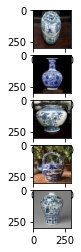

In [5]:
img = np.empty(5, dtype=object)

for i in range(5):
    file = "porcelain" + str(i+1) + ".jfif"
    img[i] = cv.imread(file)
    img[i] = cv.resize(img[i], (300, 300), interpolation = cv.INTER_AREA)
    
    
for i in range(5):
    img[i] = cv.cvtColor(img[i],  cv.COLOR_BGR2RGB)
    plt.subplot(5, 1, i+1)
    plt.imshow(img[i])

<function matplotlib.pyplot.show(close=None, block=None)>

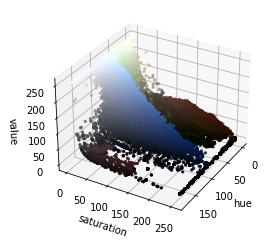

In [6]:
#hsv color space
img_hsv = np.empty(5, dtype=object)
for i in range(5):
    img_hsv[i]= cv.cvtColor(img[i], cv.COLOR_RGB2HSV)

img_test = img_hsv[0]
h,s,v = cv.split(img_test)
flg = plt.figure()
axis = flg.add_subplot(1, 1, 1, projection = "3d")

#normalize the color range to show color for each pixel
pixel_colors = img[0].reshape((img[0].shape[0]*img[0].shape[1], 3))
norm = colors.Normalize(vmin = 0, vmax = 1)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

#Plot
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolor = pixel_colors, marker = ".")
axis.view_init(30, 30)
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show

NameError: name 'hsv_to_rgb' is not defined

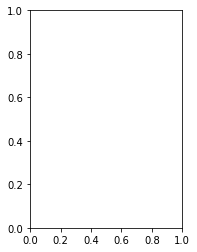

In [7]:
#assure/ verify that determined hsv
light_blue = (80, 50, 50)
dark_blue = (140, 250, 200)

#light_blue = #(90,50,70) 
#dark_blue = #(128, 250, 250) 

square_light = np.full((10, 10, 3), light_blue, dtype = np.uint8)/255.0
square_dark = np.full((10, 10, 3), dark_blue, dtype = np.uint8)/255.0

plt.subplot(1,2,1)
plt.imshow(hsv_to_rgb(square_light))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(square_dark))
plt.show

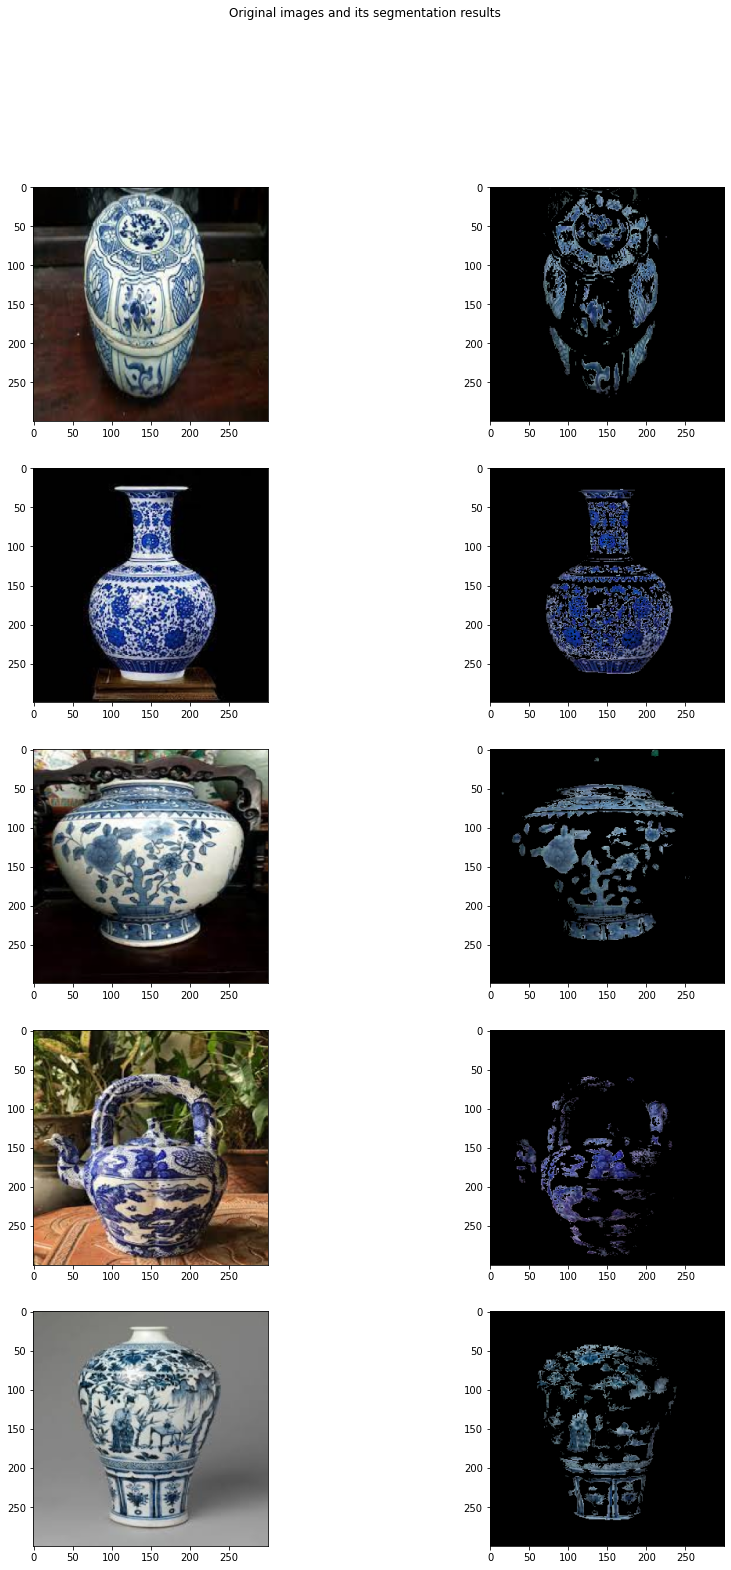

In [8]:
mask = np.empty(5, dtype=object)
res = np.empty(5, dtype=object)

for i in range(5):
    mask[i] = cv.inRange(img_hsv[i], light_blue, dark_blue)
    res[i] = cv.bitwise_and(img[i], img[i], mask = mask[i])

f, ax = plt.subplots(5, 2, figsize = (15, 25))
    
for i in range(5):
    ax[i][0].imshow(img[i])
    ax[i][1].imshow(res[i])
    
f.suptitle('Original images and its segmentation results')
plt.show()